In [3]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [5]:
#read in sqlite file
path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)
conn = engine.connect()

In [6]:
#bring in inspector and retreive table names
inspector = inspect(engine)
                                                                                                                                                                          
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [10]:
#loop through tables and get column names and display dataframe
for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
        
    display(pd.DataFrame(columns))
    
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [11]:
#display first 5 of measurement table
query = """
        SELECT *
        FROM measurement
        LIMIT 5;
        """
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
#diplay first 5 of station table
query = """
        SELECT *
        FROM station
        LIMIT 5;
        """
pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [14]:
#sort by date descending
query = """
        SELECT *
        FROM measurement
        ORDER BY date desc
        """
pd.read_sql(query, conn)

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0
...,...,...,...,...,...
19545,9008,USC00518838,2010-01-01,0.21,72.0
19546,9519,USC00519523,2010-01-01,0.15,75.0
19547,12188,USC00519281,2010-01-01,0.15,70.0
19548,14960,USC00511918,2010-01-01,0.05,66.0


In [28]:
#display dat and precipitation dates later than 2016-08-23
query = """
        SELECT date, prcp
        FROM measurement
        WHERE date >= '2016-08-23';
        """

df = pd.read_sql(query, conn)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2230 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [30]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
df.shape

(2230, 2)

In [33]:
df2 = df.sort_values('date')
df2

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


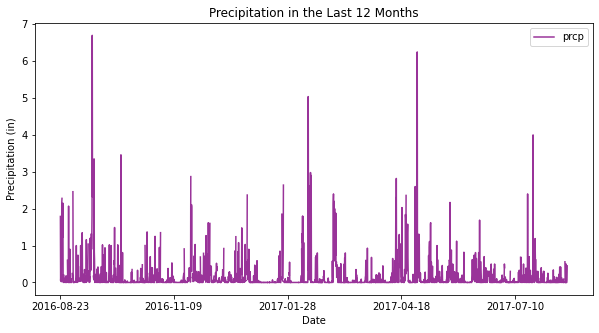

In [65]:
#plot precipitation in the last 12 months
df2.plot('date', 'prcp', title="Precipitation in the Last 12 Months", color='purple', alpha=0.8,figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.savefig("LastYearsRain.png")
plt.show()

In [70]:
#count number of stations
query = """
        SELECT COUNT(station)
        FROM station
        """

pd.read_sql(query, conn)

,COUNT(station)
0,9


In [71]:
#find most busy station
query=  """
        SELECT *, COUNT(id) AS "observations"
        FROM station
        GROUP BY station;
        """

pd.read_sql(query, conn)

,id,station,name,latitude,longitude,elevation,observations
0,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,1
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1
3,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1
4,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,1
5,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,1
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1
7,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1
8,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,1


In [77]:
#find average temp of busiest station
query= """
        SELECT AVG(tobs) AS "Average temp"
        FROM measurement
        WHERE station = 'USC00516128';
        """


pd.read_sql(query, conn)

,Average temp
0,70.915008


In [82]:
#find max temp of busiest station
query = """
        SELECT MAX(tobs) AS "Max temp"
        FROM measurement
        WHERE station = 'USC00516128'
        GROUP BY station;
        """


pd.read_sql(query, conn)

,Max temp
0,84.0


In [83]:
#find min temp of busiest station
query = """
        SELECT MIN(tobs) AS "Min temp"
        FROM measurement
        WHERE station = 'USC00516128'
        GROUP BY station;
        """


pd.read_sql(query, conn)

,Min temp
0,58.0


In [85]:
#information for busiest station on dates greater than 2016-08-23
query = """
        SELECT *
        FROM measurement
        WHERE station = 'USC00516128' AND date >= '2016-08-23';
        """
df3 = pd.read_sql(query, conn)
df3

,id,station,date,prcp,tobs
0,19202,USC00516128,2016-08-23,0.70,74.0
1,19203,USC00516128,2016-08-24,1.45,74.0
2,19204,USC00516128,2016-08-25,0.11,77.0
3,19205,USC00516128,2016-08-27,NaN,74.0
4,19206,USC00516128,2016-08-28,2.07,71.0
...,...,...,...,...,...
344,19546,USC00516128,2017-08-19,0.09,71.0
345,19547,USC00516128,2017-08-20,NaN,78.0
346,19548,USC00516128,2017-08-21,0.56,76.0
347,19549,USC00516128,2017-08-22,0.50,76.0


In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       349 non-null    int64  
 1   station  349 non-null    object 
 2   date     349 non-null    object 
 3   prcp     328 non-null    float64
 4   tobs     349 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 13.8+ KB


In [87]:
df3.describe()

,id,prcp,tobs
count,349.000000,328.000000,349.000000
mean,19376.000000,0.450640,72.091691
std,100.891856,0.717174,3.762743
min,19202.000000,0.000000,58.000000
25%,19289.000000,0.010000,70.000000
50%,19376.000000,0.190000,72.000000
75%,19463.000000,0.610000,75.000000
max,19550.000000,6.700000,82.000000


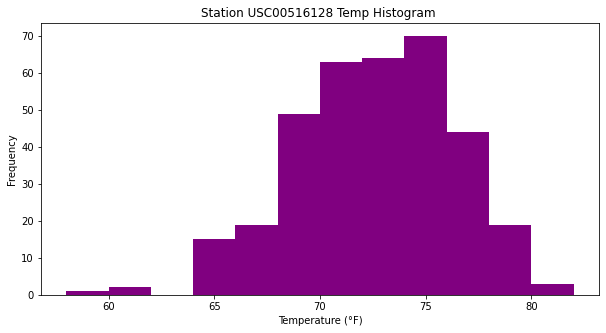

In [92]:
#histogram for busiest station
plt.figure(figsize=(10,5))
plt.hist(df3.tobs, bins=12, color='purple')
plt.title("Station USC00516128 Temp Histogram ")
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.savefig("temp_histogram.png")
plt.show()